In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [18]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income-class']
df = pd.read_csv(link, names = names)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


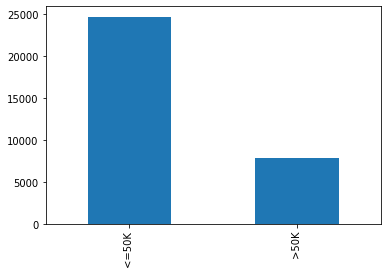

In [20]:
df['income-class'].value_counts().plot.bar()

In [21]:
types = df.dtypes
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object':
    le.fit_transform(df[names[i]])
    df[names[i]] = le.transform(df[names[i]])

In [22]:
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape)
print(y.shape)

(32561, 14)
(32561,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [29]:
y_pred = mlp_clf.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.82


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


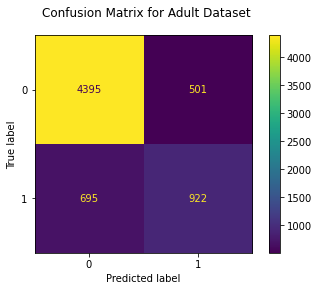

In [30]:
fig = plot_confusion_matrix(mlp_clf, X_test_scaled, y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Adult Dataset")
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4896
           1       0.65      0.57      0.61      1617

    accuracy                           0.82      6513
   macro avg       0.76      0.73      0.74      6513
weighted avg       0.81      0.82      0.81      6513



In [46]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
print(y_train[:2])

[[1. 0.]
 [1. 0.]]


In [55]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [57]:
history = model.fit(x=X_train,y=y_train, validation_split=0.2,
                    batch_size=128,epochs=100)


Epoch 1/100
163/163 [==============================] - 0s 3ms/step - loss: 44.5640 - accuracy: 0.6878 - val_loss: 15.1189 - val_accuracy: 0.7843
Epoch 2/100
163/163 [==============================] - 0s 3ms/step - loss: 65.4352 - accuracy: 0.6783 - val_loss: 73.4465 - val_accuracy: 0.7797
Epoch 3/100
163/163 [==============================] - 0s 3ms/step - loss: 62.7387 - accuracy: 0.6858 - val_loss: 106.5617 - val_accuracy: 0.7749
Epoch 4/100
163/163 [==============================] - 0s 3ms/step - loss: 54.0808 - accuracy: 0.6795 - val_loss: 34.2920 - val_accuracy: 0.7910
Epoch 5/100
163/163 [==============================] - 0s 2ms/step - loss: 56.0140 - accuracy: 0.6855 - val_loss: 65.9295 - val_accuracy: 0.7854
Epoch 6/100
163/163 [==============================] - 0s 3ms/step - loss: 71.4998 - accuracy: 0.6814 - val_loss: 26.4720 - val_accuracy: 0.7881
Epoch 7/100
163/163 [==============================] - 1s 3ms/step - loss: 35.0007 - accuracy: 0.6931 - val_loss: 31.4764 - val_a

In [58]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32)                480       
                                                                 
 dense_41 (Dense)            (None, 32)                1056      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 2)                 34        
                                                                 
Total params: 2,098
Trainable params: 2,098
Non-trainable params: 0
_________________________________________________________________


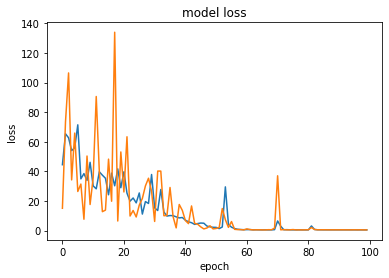

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()